In [362]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [363]:
# import the leads dataset
leads = pd.read_csv('Leads.csv')
pd.set_option('display.max_columns', 50)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [364]:
# Check the dimension of the dataframe
leads.shape

(9240, 37)

In [365]:
# check the summary for the numeric column
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [366]:
# let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- Data type for all the object seems good

In [367]:
# Get the percentage of null value in each column
((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [368]:
# Check distinct value count for each column
leads.nunique().sort_values()

Get updates on DM Content                           1
I agree to pay the amount through cheque            1
Receive More Updates About Our Courses              1
Magazine                                            1
Update me on Supply Chain Content                   1
Through Recommendations                             2
Digital Advertisement                               2
Newspaper                                           2
X Education Forums                                  2
A free copy of Mastering The Interview              2
Search                                              2
Newspaper Article                                   2
Converted                                           2
Do Not Call                                         2
Do Not Email                                        2
What matters most to you in choosing a course       3
Asymmetrique Activity Index                         3
Asymmetrique Profile Index                          3
Lead Origin                 

In [369]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [370]:
# Display all the categories of Lead Quality
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [371]:
# Check the value count for categorical variable
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [372]:
# Display all the categories of Lead Score
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
testone                 1
blog                    1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [373]:
# From the value count we can see there is two column name for google isused so replace the name 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
testone                 1
Pay per Click Ads       1
blog                    1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

#### Analyze Specialization

In [374]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [375]:
leads['Specialization'].isnull().sum()

1438

In [376]:
# value count for city
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [377]:
# Value count for How did you hear about X Education
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

#### Few columns have 'Select' as a value this is probabily because the lead has not selected any options from the dropdown ofthe form and by default the column value is 'Select'.

#### So we can consider these column as blank or 'Nan', replace the 'Select' value with 'Nan'. The columns are:

- Lead Profile
- Specialization
- City
- How did you hear about X Education

In [378]:
# Convert the value select to null 
Select = ['Lead Profile','Specialization','City','How did you hear about X Education']
for i in Select:
    leads[i][leads[i] == 'Select'] = np.nan

In [379]:
# Check weather the Select value is replaced by null or not.
leads['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [380]:
# Get the percentage of null value in each column
((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

Few column have more than 45% null value and it does not make sense to impute 45% null value so better drop those columns


In [381]:
# Remove columns of application data with percentage of null value greater than 45%
leads = leads.loc[:,((leads.isnull().sum()/len(leads))*100) <= 45]


In [382]:
# Check percentage of null value again
((leads.isnull().sum()/len(leads))*100).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Lead Number                                       0.000000
Lead Origin                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.0000

### Columns TotalVisits, Page Views Per Visit, Last Activity, Lead Source have very less missing values so we can remove those rows which have missing value as 1% or 2% it will not affect our analysis

In [383]:
#Check number of columns with TotalVisits is null
leads['TotalVisits'].isnull().sum()

137

In [384]:
#Remove the rows with null value of TotalVisits
leads = leads[~leads['TotalVisits'].isnull()]

In [385]:
# Check the number of null value again
leads['TotalVisits'].isnull().sum()

0

In [386]:
# Check number of null value for Page Views Per Visit
leads['Page Views Per Visit'].isnull().sum()

0

In [387]:
# Check number of null value for Last Activity
leads['Last Activity'].isnull().sum()

0

In [388]:
# Check number of null value for Lead Source
leads['Lead Source'].isnull().sum()

29

In [389]:
#Remove the rows with null value of Lead Source
leads = leads[~leads['Lead Source'].isnull()]

In [390]:
# Check null value count for Lead Source
leads['Lead Source'].isnull().sum()

0

- City                                             39.707792
- Specialization                                   36.580087
- Tags                                             36.287879
- What matters most to you in choosing a course    29.318182
- What is your current occupation                  29.112554
- Country                                          26.634199

In [391]:
# Value percentage of City
leads['City'].value_counts(normalize = True)

Mumbai                         0.577741
Thane & Outskirts              0.135479
Other Cities                   0.123659
Other Cities of Maharashtra    0.081106
Other Metro Cities             0.068558
Tier II Cities                 0.013457
Name: City, dtype: float64

- City colunmn has around 40% missing value and if we see the rest 60 % data, out of 60%, 35% is only from mumbai and so the data is very much skewed. so better we can drop this column

In [392]:
# Drop City column
leads = leads.drop('City', axis =1)

In [393]:
# Get the percentage of each value in the country column
leads['Country'].value_counts(normalize = True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Kuwait                  0.000590
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Canada                  0.000590
Sweden                  0.000443
Bangladesh              0.000295
Ghana                   0.000295
Italy                   0.000295
Philippines             0.000295
Asia/Pacific Region     0.000295
China                   0.000295
Uganda                  0.000295
Netherlands             0.000295
Belgium                 0.000295
Liberia                 0.000148
Indonesia               0.000148
Vietnam   

- we can see the country column is highly skewed as 95% data is from India only, the data from all other country is very less and will not help in our analysis so better we will drop this column

In [394]:
# Drop City column
leads = leads.drop('Country', axis =1)

Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554


In [395]:
# Treating  Specialization column

In [396]:
leads['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.557320
Human Resource Management            14.450967
Marketing Management                 14.209254
Operations Management                 8.615331
Business Administration               6.888812
IT Projects Management                6.319061
Supply Chain Management               5.973757
Banking, Investment And Insurance     5.783840
Media and Advertising                 3.487569
Travel and Tourism                    3.487569
International Business                3.038674
Healthcare Management                 2.693370
Hospitality Management                1.916436
E-COMMERCE                            1.916436
Retail Management                     1.726519
Rural and Agribusiness                1.260359
E-Business                            0.984116
Services Excellence                   0.690608
Name: Specialization, dtype: float64

In [397]:
leads['Specialization'].isnull().sum()

3282

In [398]:
# Create a seperate category 'Others' for null value
leads['Specialization'][leads['Specialization'].isnull()] = 'Others'

In [399]:
leads['Specialization'].isnull().sum()

0

In [400]:
# bucketing the specialization value which has less percentage below 10
leads['Specialization'] = np.where(leads['Specialization'].isin(leads['Specialization'].value_counts().index[:4]), 
                                   leads['Specialization'], 'Other_specialization')

In [401]:
leads['Specialization'].value_counts(normalize = True)*100

Others                       36.169275
Other_specialization         34.968041
Finance Management           10.568658
Human Resource Management     9.224157
Marketing Management          9.069870
Name: Specialization, dtype: float64

In [402]:
# Tags
leads['Tags'].value_counts(normalize = True)*100

Will revert after reading the email                  35.079172
Ringing                                              20.654254
Interested in other courses                           8.856795
Already a student                                     8.091178
Closed by Horizzon                                    5.237515
switched off                                          4.176092
Busy                                                  3.219071
Lost to EINS                                          2.992866
Not doing further education                           2.523056
Interested  in full time MBA                          2.018444
Graduation in progress                                1.931442
invalid number                                        1.444232
Diploma holder (Not Eligible)                         1.096224
wrong number given                                    0.817818
opp hangup                                            0.574213
number not provided                                   0

In [403]:
# Count of null value present in Tags column
leads['Tags'].isnull().sum()

3327

In [404]:
# convert the null value with Others value
leads['Tags'][leads['Tags'].isnull()] = 'Others'


In [405]:
# Count of null value present in Tags column
leads['Tags'].isnull().sum()

0

In [406]:
# Count of value present in Tags column
leads['Tags'].value_counts(normalize = True)*100

Others                                               36.665197
Will revert after reading the email                  22.217324
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

In [407]:
# What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(normalize = True)

Better Career Prospects      0.999686
Other                        0.000157
Flexibility & Convenience    0.000157
Name: What matters most to you in choosing a course, dtype: float64

In [408]:
leads['What matters most to you in choosing a course'].isnull().sum()

2702

- value is highly skewed so better drop the column as it will not help in the analysis


In [409]:
# Drop the column
leads = leads.drop('What matters most to you in choosing a course', axis =1)

#### Analyse and treatcolumn - What is your current occupation

In [410]:
# What is your current occupation
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: What is your current occupation, dtype: float64

In [411]:
leads['What is your current occupation'].isnull().sum()

2683

In [412]:
leads['What is your current occupation'][leads['What is your current occupation'].isnull()] = 'Others'

In [413]:
leads['What is your current occupation'].isnull().sum()

0

In [414]:
# bucket akk other occupation type to one category says other_occupation
leads['What is your current occupation'] = np.where(leads['What is your current occupation'].
                                                    isin(leads['What is your current occupation'].
                                                         value_counts().index[:2]), leads['What is your current occupation'], 
                                                    'Other_occupation')

In [415]:
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed          0.603482
Others              0.295680
Other_occupation    0.100838
Name: What is your current occupation, dtype: float64

#### Drop identifiers column from the data 

In [416]:
# Drop the lead number 
leads= leads.drop('Prospect ID', axis =1)

 Binary Variables: - 
 'Do Not Email','Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations', 'A free copy of Mastering The Interview','Magazine',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque'

#### Check value count for binary variables

In [417]:
leads['Do Not Email'].value_counts(normalize = True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

In [418]:
leads['Do Not Call'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [419]:
leads['Search'].value_counts(normalize = True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [420]:
leads['Newspaper Article'].value_counts(normalize = True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [421]:

leads['X Education Forums'].value_counts(normalize = True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [422]:
leads['Newspaper'].value_counts(normalize = True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [423]:
leads['Digital Advertisement'].value_counts(normalize = True)

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

In [424]:
leads['Through Recommendations'].value_counts(normalize = True)

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

In [425]:
leads['A free copy of Mastering The Interview'].value_counts(normalize = True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [426]:
leads['Magazine'].value_counts(normalize = True)

No    1.0
Name: Magazine, dtype: float64

In [427]:
leads['Receive More Updates About Our Courses'].value_counts(normalize = True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [428]:
leads['Update me on Supply Chain Content'].value_counts(normalize = True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [429]:
leads['Get updates on DM Content'].value_counts(normalize = True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [430]:
leads['I agree to pay the amount through cheque'].value_counts(normalize = True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

- value is highly skewed so better drop the column as it will not help in the analysis

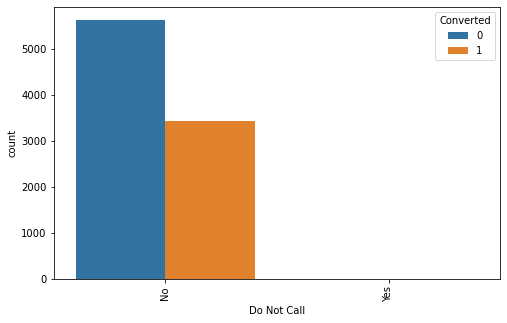

In [431]:
# Plot Do Not Call for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

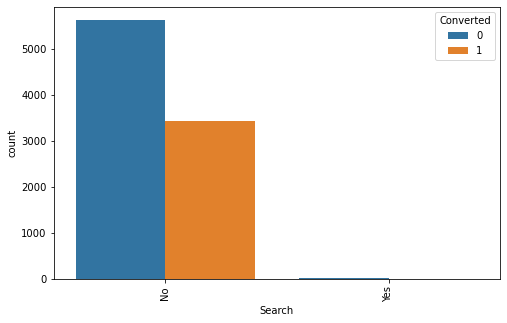

In [432]:
# Plot Search for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Search'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

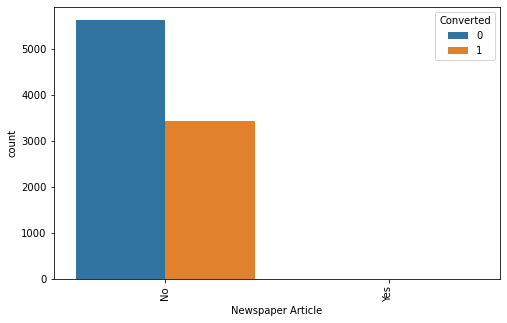

In [433]:
# Plot Newspaper Article for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Newspaper Article'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

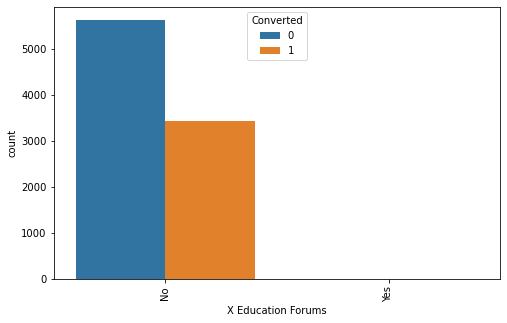

In [434]:
# Plot X Education Forums for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['X Education Forums'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

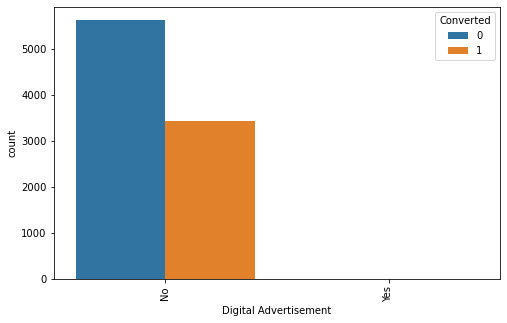

In [435]:
# Plot Digital Advertisement for conveted and not converted
plt.figure(figsize=(8,5))
s1=sns.countplot(leads['Digital Advertisement'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [436]:
# drop the columns with 99 and 100 % same values
leads = leads.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement',
                    'Through Recommendations','Magazine', 'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                    'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1)

In [437]:
leads.shape

(9074, 14)

### Outlier Treatment

In [438]:
# checking outliers at 25%, 50%, 75%, 90%, 95%, 99%
leads_num = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
leads_num.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


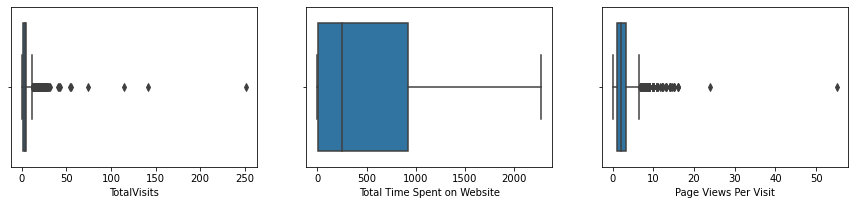

In [439]:
# Check the outliers for continious variable
plt.figure(figsize = [15,10])
feature = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(leads[i[1]])

- outliers are present in 2 columns
  - Page Views Per Visit
  - TotalVisits

In [440]:
# Cap the outlier of TotalVisits by 95 percentile
q4 = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits']>=q4] = q4

In [441]:
# Cap the outliers of Page Views Per Visit by 95 percentile
q4 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>=q4] = q4

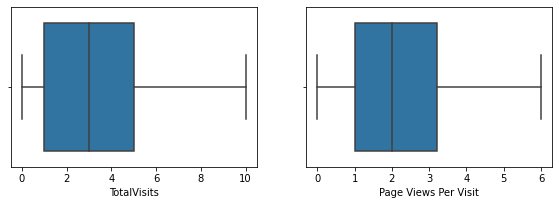

In [442]:
# Check the outliers for continious variable
plt.figure(figsize = [15,10])
feature = leads[['TotalVisits','Page Views Per Visit']]
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(leads[i[1]])

## EDA

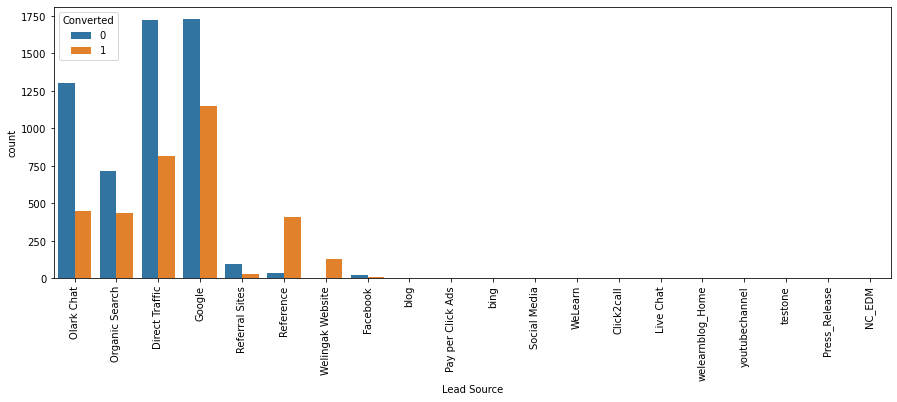

In [443]:
# Plot lead Source for conveted and not converted
plt.figure(figsize=(15,5))
s1=sns.countplot(leads['Lead Source'], hue=leads.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

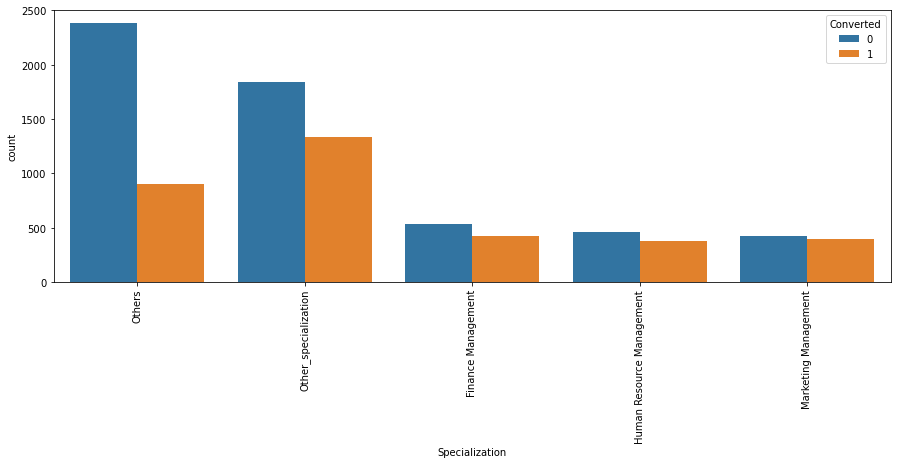

In [444]:
#plotting spread of Country columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads.Specialization, hue=leads.Converted)
s1.set(xlabel = 'Specialization')
plt.xticks(rotation=90)
plt.show()

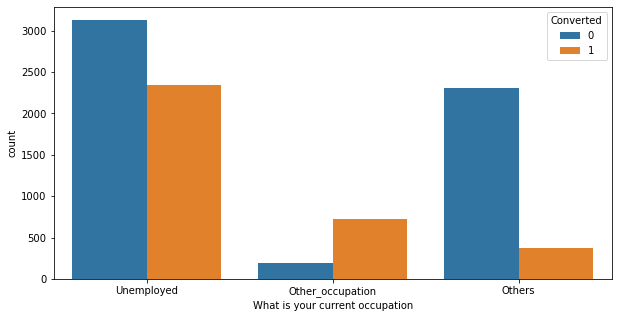

In [445]:
# Plot What is your current occupation
plt.figure(figsize=(10,5))
s2=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s2.set(xlabel = 'What is your current occupation')
plt.xticks(rotation=0)
plt.show()

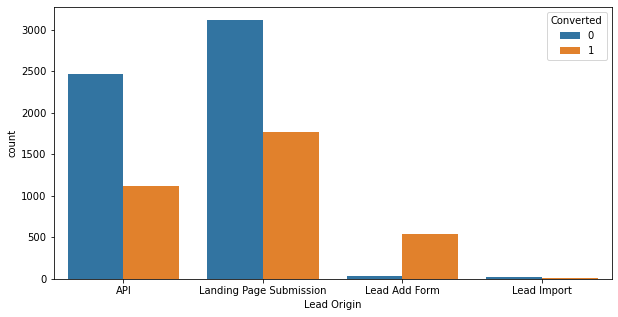

In [446]:
#visualizing count of Variable Lead Origin based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(leads['Lead Origin'], hue=leads.Converted)
s2.set(xlabel = 'Lead Origin')
plt.xticks(rotation=0)
plt.show()

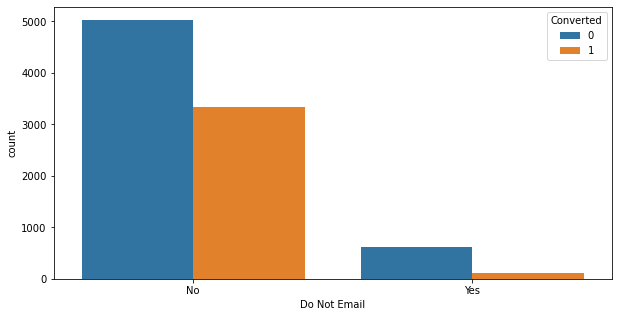

In [447]:
#visualizing count of Variable Do Not Email based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s2.set(xlabel = 'Do Not Email')
plt.xticks(rotation=0)
plt.show()

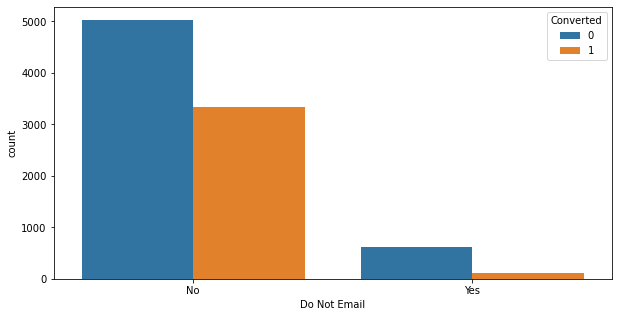

In [448]:
#visualizing count of Variable Lead Origin based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s2.set(xlabel = 'Do Not Email')
plt.xticks(rotation=0)
plt.show()

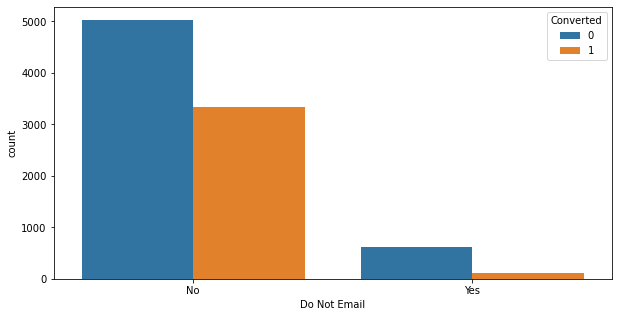

In [449]:
#visualizing count of Variable Lead Origin based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s2.set(xlabel = 'Do Not Email')
plt.xticks(rotation=0)
plt.show()

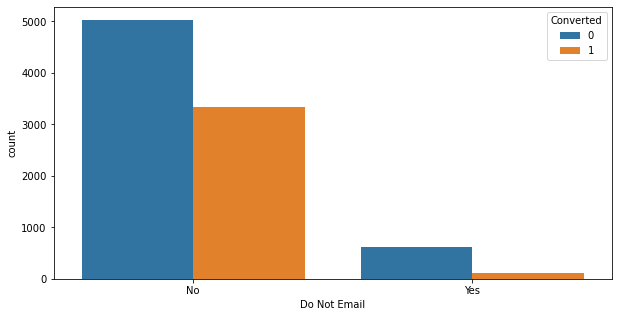

In [450]:
#visualizing count of Variable Lead Origin based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
s2.set(xlabel = 'Do Not Email')
plt.xticks(rotation=0)
plt.show()

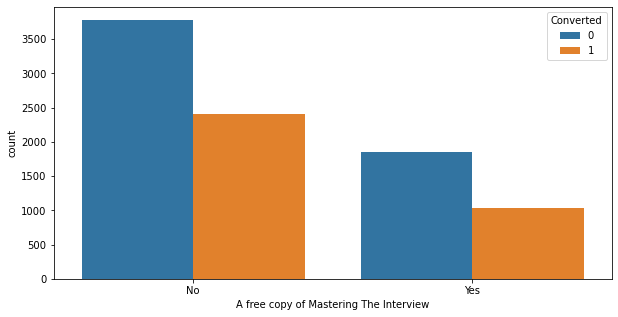

In [451]:
#visualizing count of Variable Lead Origin based on Converted value

plt.figure(figsize=(10,5))
s2=sns.countplot(leads['A free copy of Mastering The Interview'], hue=leads.Converted)
s2.set(xlabel = 'A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.show()

## Data Preparation

### Converting some binary variables (Yes/No) to 0/1

#### Binary variables present in the data set:

- Do Not Email,
- A free copy of Mastering The Interview.

In [452]:
# List of variables to map for binary value

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the binary variables
leads[varlist] = leads[varlist].apply(binary_map)

In [453]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Other_specialization,Other_occupation,Will revert after reading the email,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Other_specialization,Unemployed,Ringing,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,0,Modified


In [454]:
leads.shape

(9074, 14)

In [455]:
# There are some column which are filles by sales team and having a call so we dont want these column at model building time.
leads = leads.drop(['Last Activity','Tags'], axis = 1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Others,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Others,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Other_specialization,Other_occupation,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_specialization,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,0,Modified


In [456]:
leads.shape

(9074, 12)

### Create Dummy Variables

In [457]:
# Check the values for lead source
leads['Lead Source'].value_counts(normalize = True)*100

Google               31.661891
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
Click2call            0.044082
Press_Release         0.022041
Social Media          0.022041
Live Chat             0.022041
testone               0.011020
Pay per Click Ads     0.011020
blog                  0.011020
welearnblog_Home      0.011020
youtubechannel        0.011020
NC_EDM                0.011020
WeLearn               0.011020
Name: Lead Source, dtype: float64

In [458]:
# Bucket all the categories whose percentage is below 20%
leads['Lead Source'] = np.where(leads['Lead Source'].isin(leads['Lead Source'].value_counts().index[:2]),
                                leads['Lead Source'], 'Others')

In [459]:
# Check the values for lead source
leads['Lead Source'].value_counts(normalize = True)*100

Others            40.312982
Google            31.661891
Direct Traffic    28.025127
Name: Lead Source, dtype: float64

In [460]:
# Check the value for Last Activity
leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
Form Submitted on Website        0.011020
Email Received                   0.011020
Resubscribed to emails           0.011020
Approached upfront               0.011020
View in browser link Clicked     0.011020
Name: Last Notable Activity, dtype: float64

In [461]:
# Bucket all the categories whose percentage is very less
leads['Last Notable Activity'] = np.where(leads['Last Notable Activity'].isin(leads['Last Notable Activity'].value_counts().index[:3]),
                                leads['Last Notable Activity'], 'Others')

In [462]:
# Check the value for Last Activity
leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified        36.003967
Email Opened    31.110866
SMS Sent        23.716112
Others           9.169054
Name: Last Notable Activity, dtype: float64

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [463]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

#### Creating dummy variables for the categorical variables and dropping specific level.


In [464]:
# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Landing Page Submission column
ml1 = ml.drop(['Lead Origin_Landing Page Submission'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

In [465]:
# Creating dummy variables for the variable 'Lead Source'.
lo = pd.get_dummies(leads['Lead Source'], prefix='Lead Source')
lo1 = lo.drop(['Lead Source_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

In [466]:
# Creating dummy variables for the variable 'Specialization'.
sp = pd.get_dummies(leads['Specialization'], prefix='Specialization')
sp1 = sp.drop(['Specialization_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,sp1], axis=1)

In [467]:
# Creating dummy variables for the variable 'What is your current occupation'.
oc = pd.get_dummies(leads['What is your current occupation'], prefix='Occupation')
oc1 = oc.drop(['Occupation_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,oc1], axis=1)

In [468]:
# Creating dummy variables for the variable 'Last Notable Activity'.
lna = pd.get_dummies(leads['Last Notable Activity'], prefix='Last Activity')
lna1 = lna.drop(['Last Activity_Others'], 1)
# Adding the results to the master dataframe
leads = pd.concat([leads,lna1], axis=1)

In [469]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
0,660737,API,Others,0,0,0.0,0,0.0,Others,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,660728,API,Others,0,0,5.0,674,2.5,Others,Unemployed,0,Email Opened,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Other_specialization,Other_occupation,1,Email Opened,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_specialization,Unemployed,0,Modified,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Unemployed,0,Modified,0,0,0,0,1,0,0,0,0,0,1,0,1,0


#### Dropping the repeated variables

In [470]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization','What is your current occupation',
                    'Last Notable Activity'],1)

In [471]:
leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,660727,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
3,660719,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,660681,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [472]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9074 non-null   int64  
 1   Do Not Email                              9074 non-null   int64  
 2   Converted                                 9074 non-null   int64  
 3   TotalVisits                               9074 non-null   float64
 4   Total Time Spent on Website               9074 non-null   int64  
 5   Page Views Per Visit                      9074 non-null   float64
 6   A free copy of Mastering The Interview    9074 non-null   int64  
 7   Lead Origin_API                           9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                 9074 non-null   uint8  
 9   Lead Origin_Lead Import                   9074 non-null   uint8  
 10  Lead Source_Direct Traffic          

In [473]:
leads.shape

(9074, 21)

- Now we have all the variable as numerical

## Test-Train Split

In [474]:
# import library
from sklearn.model_selection import train_test_split

In [475]:
leads = leads.set_index('Lead Number')
leads.index.name = None
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
660727,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
660681,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [476]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
660727,0,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
660719,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
660681,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [477]:
X.shape

(9074, 19)

In [478]:
# Putting response variable to y
y = leads['Converted']
y.head()

660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [479]:
leads.shape

(9074, 20)

In [480]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [481]:
from sklearn.preprocessing import StandardScaler

In [482]:
# Scale only the continious data 
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website',
                                                                  'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
630949,0,-0.432779,-0.160255,-0.155018,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
649355,1,-0.432779,-0.540048,-0.155018,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
579735,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
614238,0,-0.432779,1.643304,-0.155018,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
588625,0,0.643547,2.017593,0.122613,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0


In [483]:
# Checking the converted rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% convert rate so we cant say its that much imbalance data we should worry about

## Looking at Correlations

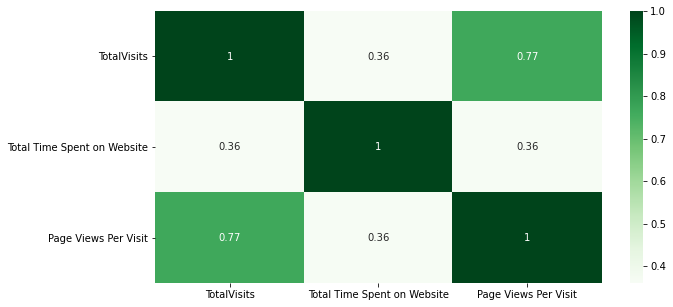

In [484]:
# Let's see the correlation matrix 
plt.figure(figsize = (10,5))        # Size of the figure
sns.heatmap(leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),annot = True, cmap = 'Greens')
plt.show()

- There is high correlation between 'TotalVisits' and 'Page Views Per Visit'

In [485]:
# Check the data set
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
660737,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
660728,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
660727,0,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
660719,0,0,1.0,305,1.0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
660681,0,1,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


##  Model Building


#### Running Your First Training Model

In [486]:
import statsmodels.api as sm

In [487]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.9
Date:                Mon, 26 Oct 2020   Deviance:                       5215.7
Time:                        20:27:31   Pearson chi2:                 6.32e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7097      0.198    -13.683      0.000      -3.098      -2.322
Do Not Email                                -1.3908      0.175     -7.935      0.000      -1.734      -1.047
TotalVisits                                  0.2314      0.053      4.338      0.000       0.127       0.336
Total Time Spent on Website                  1.0471      0.039     26.525      0.000       0.970       1.124
Page Views Per Visit                        -0.4083      0.058     -6.983      0.000      -0.523      -0.294
A free copy of Mastering The Interview      -0.3238      0.106     -3.050      0.002      -0.532      -0.116
Lead Origin_API                              0.8724      0.133      6.574      0.000       0.612       1.133
Lead Origin_Lead Add Form                    3.8523      0.249     15.495      0.000       3.365       4.340
Lead Origin_Lead Import                      1.0412      0.476      2.187      0.029       0.108       1.974
Lead Source_Direct Traffic                  -0.4800      0.113     -4.242      0.000      -0.702      -0.258
Lead Source_Google                          -0.2810      0.099     -2.831      0.005      -0.476      -0.086
Specialization_Finance Management            1.1286      0.162      6.967      0.000       0.811       1.446
Specialization_Human Resource Management     1.0615      0.161      6.598      0.000       0.746       1.377
Specialization_Marketing Management          1.1989      0.160      7.501      0.000       0.886       1.512
Specialization_Other_specialization          1.0266      0.134      7.641      0.000       0.763       1.290
Occupation_Other_occupation                  2.5230      0.145     17.420      0.000       2.239       2.807
Occupation_Unemployed                        1.0741      0.090     11.944      0.000       0.898       1.250
Last Activity_Email Opened                   0.2136      0.136      1.571      0.116      -0.053       0.480
Last Activity_Modified                      -0.4353      0.138     -3.148      0.002      -0.706      -0.164
Last Activity_SMS Sent                       1.6159      0.140     11.508      0.000       1.341       1.891
============================================================================================================
"""

- Stat model gives us a lot of statistical value and from the higher p value we can drop by columns one by one to get set of final columns for the model. but we will do it by RFE here

## Feature Selection Using RFE

In [488]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [489]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [490]:
# Check what are the features that are supported by RFE in the model, True = present in top 15
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [491]:
# To see all the columns, check weatherit is supported by RFE, and there rank
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Specialization_Finance Management', True, 1),
 ('Specialization_Human Resource Management', True, 1),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Other_specialization', True, 1),
 ('Occupation_Other_occupation', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Last Activity_Email Opened', False, 5),
 ('Last Activity_Modified', True, 1),
 ('Last Activity_SMS Sent', True, 1)]

In [492]:
# Columns names supported by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Other_specialization', 'Occupation_Other_occupation',
       'Occupation_Unemployed', 'Last Activity_Modified',
       'Last Activity_SMS Sent'],
      dtype='object')

In [493]:
# Colums which are excluded
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Last Activity_Email Opened'],
      dtype='object')

##### Assessing the model with StatsModels

In [494]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.0
Date:                Mon, 26 Oct 2020   Deviance:                       5274.0
Time:                        20:27:31   Pearson chi2:                 6.23e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.6531      0.162    -16.339      0.000      -2.971      -2.335
Do Not Email                                -1.4297      0.171     -8.357      0.000      -1.765      -1.094
Total Time Spent on Website                  1.0092      0.038     26.490      0.000       0.935       1.084
Lead Origin_API                              1.1014      0.127      8.688      0.000       0.853       1.350
Lead Origin_Lead Add Form                    4.2616      0.237     17.955      0.000       3.796       4.727
Lead Origin_Lead Import                      1.4668      0.468      3.137      0.002       0.550       2.383
Lead Source_Direct Traffic                  -0.5165      0.108     -4.792      0.000      -0.728      -0.305
Lead Source_Google                          -0.2373      0.092     -2.585      0.010      -0.417      -0.057
Specialization_Finance Management            1.0231      0.158      6.481      0.000       0.714       1.333
Specialization_Human Resource Management     0.9486      0.157      6.055      0.000       0.642       1.256
Specialization_Marketing Management          1.1012      0.157      7.016      0.000       0.794       1.409
Specialization_Other_specialization          0.9012      0.129      6.986      0.000       0.648       1.154
Occupation_Other_occupation                  2.5159      0.145     17.405      0.000       2.233       2.799
Occupation_Unemployed                        1.0498      0.089     11.770      0.000       0.875       1.225
Last Activity_Modified                      -0.6124      0.083     -7.355      0.000      -0.776      -0.449
Last Activity_SMS Sent                       1.3868      0.085     16.254      0.000       1.220       1.554
============================================================================================================
"""

In [495]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

630949    0.090443
649355    0.067331
579735    0.118036
614238    0.726467
588625    0.581038
646388    0.816741
632041    0.059707
612248    0.969826
591797    0.824501
646673    0.541390
dtype: float64

In [496]:
# Reshaping the predicted values on the train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09044331, 0.06733074, 0.11803593, 0.72646722, 0.58103794,
       0.81674074, 0.05970652, 0.96982618, 0.82450108, 0.54139047])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [497]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.090443,630949
1,0,0.067331,649355
2,0,0.118036,579735
3,1,0.726467,614238
4,1,0.581038,588625


## Plotting the ROC Curve

In [498]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [499]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

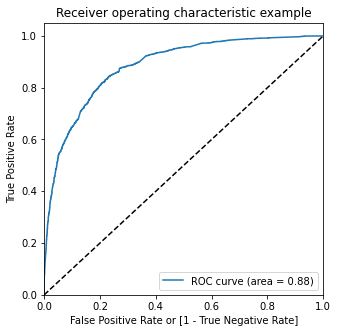

In [500]:
# Draw ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [501]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.090443,630949,1,0,0,0,0,0,0,0,0,0
1,0,0.067331,649355,1,0,0,0,0,0,0,0,0,0
2,0,0.118036,579735,1,1,0,0,0,0,0,0,0,0
3,1,0.726467,614238,1,1,1,1,1,1,1,1,0,0
4,1,0.581038,588625,1,1,1,1,1,1,0,0,0,0


In [502]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.619430  0.975470  0.396415
0.2   0.2  0.753267  0.898201  0.662484
0.3   0.3  0.795150  0.845053  0.763892
0.4   0.4  0.806960  0.784137  0.821255
0.5   0.5  0.801291  0.677433  0.878873
0.6   0.6  0.799244  0.605478  0.920615
0.7   0.7  0.787750  0.528209  0.950320
0.8   0.8  0.757046  0.417825  0.969526
0.9   0.9  0.709967  0.265740  0.988220


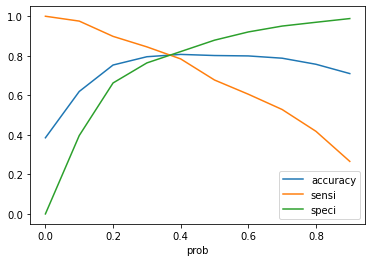

In [503]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.375 is the optimum point to take it as a cutoff probability.

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.375 else 0

In [504]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.375 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.090443,630949,1,0,0,0,0,0,0,0,0,0,0
1,0,0.067331,649355,1,0,0,0,0,0,0,0,0,0,0
2,0,0.118036,579735,1,1,0,0,0,0,0,0,0,0,0
3,1,0.726467,614238,1,1,1,1,1,1,1,1,0,0,1
4,1,0.581038,588625,1,1,1,1,1,1,0,0,0,0,1


In [505]:
# Droping all the columns for every cutoff as it is not required
y_train_pred_final = y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.090443,630949,0
1,0,0.067331,649355,0
2,0,0.118036,579735,0
3,1,0.726467,614238,1
4,1,0.581038,588625,1


In [506]:
# Import library
from sklearn import metrics

In [507]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3138  767]
 [ 479 1967]]


In [508]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8038104235553456


In [509]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [510]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.804170073589534

In [511]:
# Let us calculate specificity
TN / float(TN+FP)

0.803585147247119

In [512]:
# Calculate false postive rate - predicting Converted when students does not converted
print(FP/ float(TN+FP))

0.19641485275288093


In [513]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7194586686174104


In [514]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8675698092341719


#### Checking VIFs

In [515]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [516]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Occupation_Unemployed,3.19
10,Specialization_Other_specialization,2.72
5,Lead Source_Direct Traffic,2.28
6,Lead Source_Google,2.07
2,Lead Origin_API,1.97
13,Last Activity_Modified,1.81
14,Last Activity_SMS Sent,1.62
11,Occupation_Other_occupation,1.58
7,Specialization_Finance Management,1.55
8,Specialization_Human Resource Management,1.48


- There are variable which have  p value greater than 0 and also the magnitude of coefficient is less . So will drop
Lead Source_Google

In [517]:
col = col.drop('Lead Source_Google', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Other_specialization', 'Occupation_Other_occupation',
       'Occupation_Unemployed', 'Last Activity_Modified',
       'Last Activity_SMS Sent'],
      dtype='object')

In [518]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.3
Date:                Mon, 26 Oct 2020   Deviance:                       5280.7
Time:                        20:27:32   Pearson chi2:                 6.22e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.7965      0.153    -18.273      0.000      -3.096      -2.497
Do Not Email                                -1.4080      0.171     -8.240      0.000      -1.743      -1.073
Total Time Spent on Website                  0.9890      0.037     26.634      0.000       0.916       1.062
Lead Origin_API                              1.1529      0.125      9.219      0.000       0.908       1.398
Lead Origin_Lead Add Form                    4.3932      0.232     18.952      0.000       3.939       4.848
Lead Origin_Lead Import                      1.6032      0.464      3.452      0.001       0.693       2.514
Lead Source_Direct Traffic                  -0.3527      0.087     -4.053      0.000      -0.523      -0.182
Specialization_Finance Management            0.9950      0.157      6.336      0.000       0.687       1.303
Specialization_Human Resource Management     0.9282      0.156      5.943      0.000       0.622       1.234
Specialization_Marketing Management          1.0662      0.156      6.831      0.000       0.760       1.372
Specialization_Other_specialization          0.8965      0.129      6.960      0.000       0.644       1.149
Occupation_Other_occupation                  2.5179      0.144     17.443      0.000       2.235       2.801
Occupation_Unemployed                        1.0470      0.089     11.751      0.000       0.872       1.222
Last Activity_Modified                      -0.6132      0.083     -7.369      0.000      -0.776      -0.450
Last Activity_SMS Sent                       1.3898      0.085     16.307      0.000       1.223       1.557
============================================================================================================
"""

In [519]:
# get the predicted probability
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [520]:
y_train_pred[:10]

array([0.09007388, 0.0708653 , 0.11019598, 0.71746624, 0.56827263,
       0.82373546, 0.06457982, 0.97267956, 0.81823173, 0.52920283])

In [521]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [522]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.375 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.090074,630949,0
1,0,0.070865,649355,0
2,0,0.110196,579735,0
3,1,0.717466,614238,1
4,1,0.568273,588625,1


In [523]:
# Let's take a look at the confusion matrix again 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion1

array([[3146,  759],
       [ 483, 1963]], dtype=int64)

In [524]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8044402456306093


In [525]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [526]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8025347506132461

In [527]:
# Let us calculate specificity
TN / float(TN+FP)

0.8056338028169014

In [528]:
# Calculate false postive rate - predicting Converted when students does not converted
print(FP/ float(TN+FP))

0.19436619718309858


In [529]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7211609110947832


In [530]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8669054836042988


so the accuracy is not affected and sensitivity is also same

##### Let's check the VIFs again

In [531]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Occupation_Unemployed,3.13
9,Specialization_Other_specialization,2.36
2,Lead Origin_API,1.90
12,Last Activity_Modified,1.79
5,Lead Source_Direct Traffic,1.73
13,Last Activity_SMS Sent,1.62
10,Occupation_Other_occupation,1.58
6,Specialization_Finance Management,1.39
3,Lead Origin_Lead Add Form,1.36
7,Specialization_Human Resource Management,1.35


The p- value is good for all the variable but VIF of Occupation_Unemployed is more, so drop it, tried creating model by dropping other variable also but the sensitivity does not improve.

In [532]:
# Let's drop Occupation_Unemployed since it has a high VIF
col = col.drop('Occupation_Unemployed')

#col = col.drop('Lead Source_Direct Traffic')
#col = col.drop('Last Activity_Modified')

col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Other_specialization', 'Occupation_Other_occupation',
       'Last Activity_Modified', 'Last Activity_SMS Sent'],
      dtype='object')

In [533]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.1
Date:                Mon, 26 Oct 2020   Deviance:                       5430.2
Time:                        20:27:32   Pearson chi2:                 6.45e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.2187      0.141    -15.739      0.000      -2.495      -1.942
Do Not Email                                -1.4041      0.169     -8.289      0.000      -1.736      -1.072
Total Time Spent on Website                  0.9938      0.037     27.225      0.000       0.922       1.065
Lead Origin_API                              1.2330      0.125      9.900      0.000       0.989       1.477
Lead Origin_Lead Add Form                    4.7753      0.233     20.468      0.000       4.318       5.233
Lead Origin_Lead Import                      1.8842      0.466      4.042      0.000       0.970       2.798
Lead Source_Direct Traffic                  -0.3223      0.086     -3.744      0.000      -0.491      -0.154
Specialization_Finance Management            1.1764      0.156      7.550      0.000       0.871       1.482
Specialization_Human Resource Management     1.1265      0.155      7.267      0.000       0.823       1.430
Specialization_Marketing Management          1.2670      0.154      8.211      0.000       0.965       1.569
Specialization_Other_specialization          1.0904      0.128      8.535      0.000       0.840       1.341
Occupation_Other_occupation                  1.7309      0.127     13.613      0.000       1.482       1.980
Last Activity_Modified                      -0.6357      0.082     -7.774      0.000      -0.796      -0.475
Last Activity_SMS Sent                       1.4973      0.084     17.747      0.000       1.332       1.663
============================================================================================================
"""

In [534]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [535]:
y_train_pred[:10]

array([0.1788981 , 0.06003489, 0.07554184, 0.86488067, 0.50122658,
       0.79675341, 0.12806778, 0.97052027, 0.78125156, 0.46164253])

In [536]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [537]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.375 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.178898,630949,0
1,0,0.060035,649355,0
2,0,0.075542,579735,0
3,1,0.864881,614238,1
4,1,0.501227,588625,1


In [538]:
# Let's take a look at the confusion matrix again 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3124,  781],
       [ 471, 1975]], dtype=int64)

In [539]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.80286569044245


In [540]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [541]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8074407195421096

In [542]:
# Let us calculate specificity
TN / float(TN+FP)

0.8

In [543]:
# Calculate false postive rate - predicting Converted when students does not converted
print(FP/ float(TN+FP))


0.2


In [544]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7166182873730044


In [545]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8689847009735744


The accuracy is still practically the same and sensitivity is more than 80 

##### Let's now check the VIFs again

In [546]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Specialization_Other_specialization,1.82
11,Last Activity_Modified,1.79
5,Lead Source_Direct Traffic,1.71
12,Last Activity_SMS Sent,1.56
2,Lead Origin_API,1.50
3,Lead Origin_Lead Add Form,1.25
6,Specialization_Finance Management,1.22
10,Occupation_Other_occupation,1.21
8,Specialization_Marketing Management,1.20
7,Specialization_Human Resource Management,1.19


All variables have a good value of VIF and p-value. So we need not drop any more variables and we can proceed with making predictions using this model only.
- Sensitivity is also good i.e 80.74 so will proceed with this model only

## Precision and Recall

In [547]:
from sklearn.metrics import precision_score, recall_score

In [548]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7166182873730044

In [549]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8074407195421096

### Precision and recall tradeoff

In [550]:
from sklearn.metrics import precision_recall_curve

In [551]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    1
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [552]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

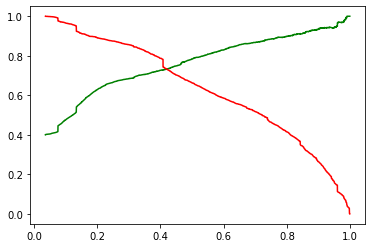

In [553]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

#### Scale the continious variable

In [554]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
628652,0,0.284772,-0.600595,0.955505,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
644500,0,0.643547,1.887326,1.510766,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
588935,0,-0.432779,-0.752879,-0.155018,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
619437,0,-1.150329,-0.888650,-1.265540,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0
623381,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [555]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Last Activity_Modified,Last Activity_SMS Sent
628652,0,-0.600595,1,0,0,0,0,0,0,0,0,0,0
644500,0,1.887326,0,0,0,1,0,0,0,1,1,0,0
588935,0,-0.752879,1,0,0,0,0,0,0,0,0,0,0
619437,0,-0.888650,0,1,0,0,0,0,0,1,1,1,0
623381,0,-0.587751,0,0,0,0,0,0,0,1,0,0,0


In [556]:
# Add constant
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [557]:
# Get the predicted probability from the model
y_test_pred = res.predict(X_test_sm)

In [558]:
y_test_pred[:10]

628652    0.170432
644500    0.896228
588935    0.150087
619437    0.979348
623381    0.152848
641959    0.464563
599959    0.439587
613711    0.268126
619391    0.959719
614597    0.075542
dtype: float64

In [559]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [560]:
# Let's see the head
y_pred_1.head()

,0
628652,0.170432
644500,0.896228
588935,0.150087
619437,0.979348
623381,0.152848


In [561]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [562]:
# Putting lead number to index
y_test_df['Lead Number'] = y_test_df.index

In [563]:
y_test_df.head()

,Converted,Lead Number
628652,0,628652
644500,1,644500
588935,0,588935
619437,1,619437
623381,0,623381


In [564]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [565]:
y_test_df.head()

,Converted,Lead Number
0,0,628652
1,1,644500
2,0,588935
3,1,619437
4,0,623381


In [566]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [567]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,628652,0.170432
1,1,644500,0.896228
2,0,588935,0.150087
3,1,619437,0.979348
4,0,623381,0.152848


In [568]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [569]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead Number','Converted','Converted_Prob']]
# or
#y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [570]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,628652,0,0.170432
1,644500,1,0.896228
2,588935,0,0.150087
3,619437,1,0.979348
4,623381,0,0.152848


In [571]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.38 else 0
y_pred_final['predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [572]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,predicted
0,628652,0,0.170432,0
1,644500,1,0.896228,1
2,588935,0,0.150087,0
3,619437,1,0.979348,1
4,623381,0,0.152848,0


In [573]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.7965479250826295

In [574]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion_test

array([[1390,  344],
       [ 210,  779]], dtype=int64)

In [575]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [576]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7876643073811931

In [577]:
# Let us calculate specificity
TN / float(TN+FP)

0.8016147635524798

### Get the final list with the lead score against each lead

In [578]:
# Final list of lead with a score assigned to it
X_leads_score = leads.drop('Converted', axis = 1)
y_leads_score = leads['Converted']


In [579]:
X_leads_score.shape

(9074, 19)

In [580]:
y_leads_score.shape

(9074,)

In [581]:
#Scale
X_leads_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_leads_score[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_leads_score.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Occupation_Unemployed,Last Activity_Email Opened,Last Activity_Modified,Last Activity_SMS Sent
660737,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
660728,0,0.643547,0.347971,0.122613,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
660727,0,-0.432779,1.922186,-0.155018,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0
660719,0,-0.791554,-0.329052,-0.710279,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
660681,0,-0.432779,1.731372,-0.710279,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0


In [582]:
X_leads_score = X_leads_score[col]
X_leads_score.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_API,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Other_specialization,Occupation_Other_occupation,Last Activity_Modified,Last Activity_SMS Sent
660737,0,-0.888650,1,0,0,0,0,0,0,0,0,1,0
660728,0,0.347971,1,0,0,0,0,0,0,0,0,0,0
660727,0,1.922186,0,0,0,1,0,0,0,1,1,0,0
660719,0,-0.329052,0,0,0,1,0,0,0,1,0,1,0
660681,0,1.731372,0,0,0,0,0,0,0,0,0,1,0


In [583]:
X_leads_score.shape

(9074, 13)

In [584]:
X_leads_score_sm = sm.add_constant(X_leads_score)

y_lead_score_pred = res.predict(X_leads_score_sm)

y_lead_score_pred[:10]

# Converting y_pred to a dataframe which is an array
y_lead_score = pd.DataFrame(y_lead_score_pred)

# Let's see the head
y_lead_score.head()

# Putting lead number to index
y_lead_score['Lead Number'] = y_lead_score.index

# Removing index for dataframe 
y_lead_score.reset_index(drop=True, inplace=True)

# Renaming the column 
y_lead_score= y_lead_score.rename(columns={ 0 : 'Converted_Prob'})

y_lead_score = y_lead_score[['Lead Number','Converted_Prob']]
y_lead_score.head()

,Lead Number,Converted_Prob
0,660737,0.075542
1,660728,0.345279
2,660727,0.899406
3,660719,0.082165
4,660681,0.243479


In [585]:
y_lead_score['Converted_Prob'] = y_lead_score['Converted_Prob']*100
y_lead_score.head()

,Lead Number,Converted_Prob
0,660737,7.554184
1,660728,34.527858
2,660727,89.940578
3,660719,8.216465
4,660681,24.347898


In [586]:
y_lead_score.shape

(9074, 2)

- 'y_lead_score' is the final data frame which is required.